In [1]:
import shapely as sp
import pandas as pd
!pip install geopandas
import geopandas as gpd
!pip install geodatasets
import geodatasets
import numpy as np
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 54.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
class City:
  name = ""
  shapelyObj = sp.Polygon()
  population = -1
  
  def __init__(self, name, coords, population):
    self.name = name
    self.shapelyObj = sp.Polygon(coords)
    self.population = population

  def setName(self, name):
    self.name = name

  def getName(self):
    return self.name

  def setPopulation(self, pop):
    self.population = pop

  def getPopulation(self):
    return self.population

  def setShapelyObj(self, obj):
    self.shapelyObj = obj

  def getShapelyObj(self):
    return self.shapelyObj

  def getCoords(self):
    return self.shapelyObj.exterior.xy

In [4]:
Elista = City("Elista", [(2.1, 2.4), (2.8, 2.6), (3, 2.1), (3.9, 1.7), (3.7, 1), (1.9, 1.1) ,(1.6, 1.7)], 103535)
Rostov_on_Don = City("Rostov-on-Don", [(-4.4, 4.1), (-3.2, 3.5), (-3.1, 2.5), (-3.3, 1.3), (-4.5, 1.8), (-5, 3.1)], 1142162)
Astrakhan = City("Astrakhan", [(7.9, 2.2), (9.9, 2.5), (9.6, 1.2), (8.7, 1.5), (7.8, 1.6)], 475629)
Volgograd = City("Volgograd", [(1, 6.3), (1.5, 8.3), (4.3, 8.3), (4.8, 6.1)], 1001183)
Stavropol = City("Stavropol", [(-0.5, -2.3), (-1.6, -2), (-2.4, -1.9), (-2.7, -2.9), (-1.8, -3.3), (-0.3, -3.1)], 458233)
Nalchik = City("Nalchik", [(2.2, -7.2), (2.5, -6.4), (3.5, -5.8), (5, -5.8), (5.3, -6.4), (4.3, -6.7) ,(3.7, -6.7), (2.8, -7.6)], 247054)
cities = [Elista, Nalchik, Astrakhan, Rostov_on_Don, Volgograd, Stavropol]

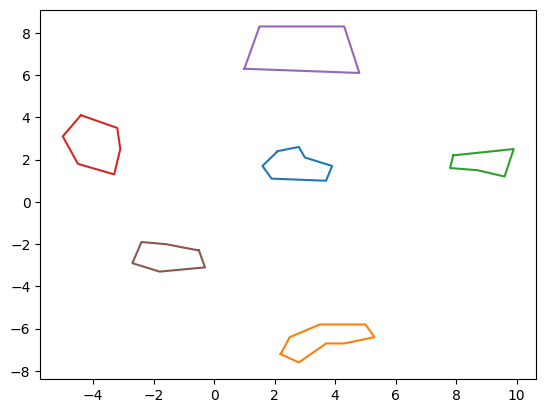

In [5]:
for city in cities:
  x, y = city.getCoords()
  plt.plot(x, y)

In [6]:
def drawBuf(sCities, bufDig):
  fig, ax = plt.subplots()
  for city in sCities:
    x, y = city.getCoords()
    plt.plot(x, y)
    x1, y1 = city.getShapelyObj().buffer(bufDig).exterior.xy
    ax.plot(x1, y1)
    ax.set_title(f"buffer = {i}")

def getIntersectionArea(mainCity, сities, bufDigits): #работает для любого города, не только для Элисты (просто закинь при вызове в mainCity целевой город)
  areaDf = pd.DataFrame(columns=[city.getName() for city in сities if city.getName() != mainCity.getName()], index=bufDigits)
  for city in сities:
    if city.getName() != mainCity.getName():
      for bufDig in bufDigits:
        cPolygon = city.getShapelyObj()
        area = sp.area(cPolygon.buffer(bufDig).intersection(mainCity.getShapelyObj().buffer(bufDig)))
        areaDf.loc[bufDig][city.getName()] = area
  return areaDf

1) Визуализации пересечений для 5 значений ширины буферной зоны

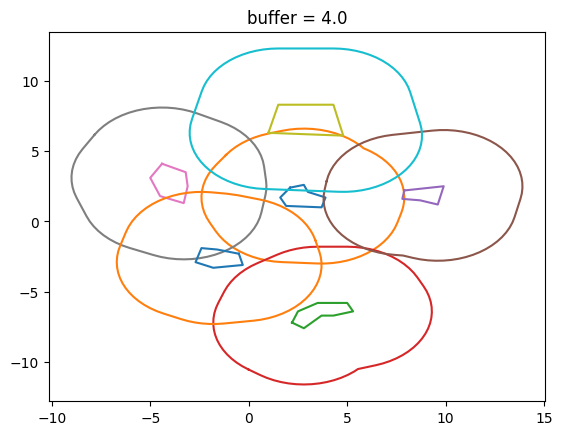

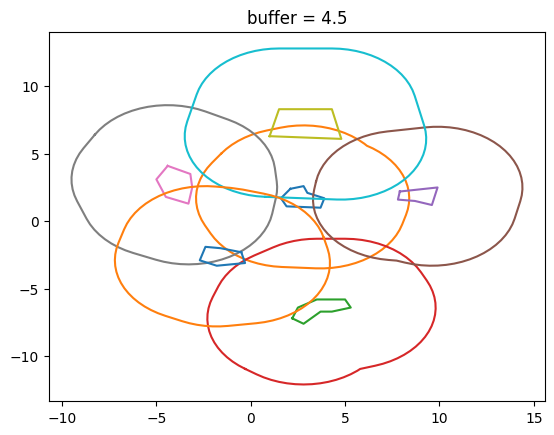

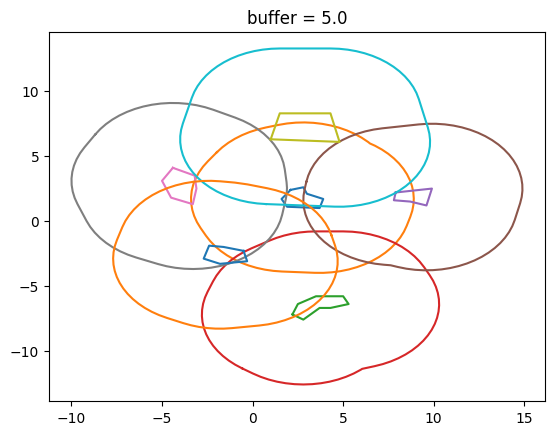

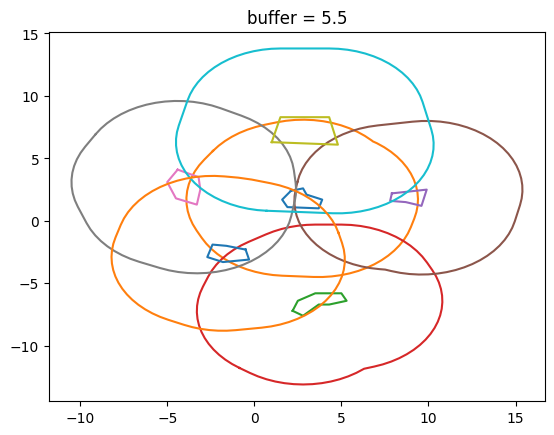

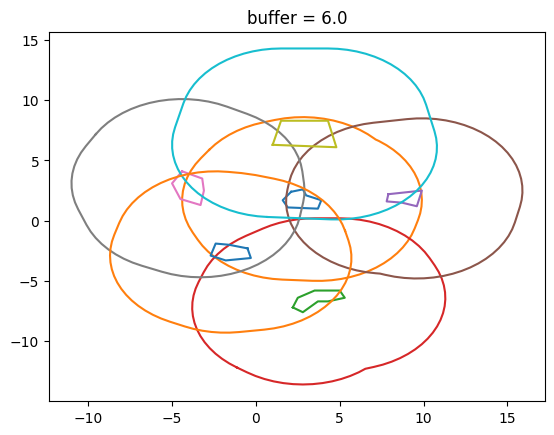

In [7]:
bufDigits = []
for i in np.arange(4,6.1,0.5):
  drawBuf(cities, i)
  bufDigits.append(i)

2) Таблица площадей пересечений

In [8]:
print(getIntersectionArea(Elista, cities, bufDigits))

       Nalchik  Astrakhan Rostov-on-Don  Volgograd  Stavropol
4.0   4.583386  21.822689     17.264575  30.505355   20.09154
4.5  11.466694  31.628146     26.738373  42.429022  29.988077
5.0  20.377023  43.066134     37.882289  55.978179  41.576345
5.5  31.106265  56.116272     50.663005  71.134971  54.813957
6.0  43.564391  70.765394     65.060343  87.888319  69.676324


In [9]:
print(Elista.getShapelyObj().buffer(4).intersection(Volgograd.getShapelyObj().buffer(4)).centroid)

POINT (2.8192103136987927 4.137554339479735)


In [10]:
def getDistToBufs(mainCity, cities, bufDigits):
  df = pd.DataFrame(columns=[city.getName() for city in cities if city.getName() != mainCity.getName()], index=bufDigits)
  mainCenter = Elista.getShapelyObj().centroid
  for city in cities:
    if city.getName() != mainCity.getName():
      for bufDig in bufDigits:
        iBufIntersecCenter = mainCity.getShapelyObj().buffer(bufDig).intersection(city.getShapelyObj().buffer(bufDig)).centroid
        iBufDist = iBufIntersecCenter.distance(mainCenter)
        df.loc[bufDig][city.getName()] = iBufDist
  return df

print(getDistToBufs(Elista, cities, bufDigits))

      Nalchik Astrakhan Rostov-on-Don Volgograd Stavropol
4.0  4.157015  3.139967       3.37857  2.474452   3.02447
4.5   4.14878  3.140262      3.365319  2.452768  3.021777
5.0  4.142749  3.140935      3.355342  2.435471   3.01941
5.5  4.137955  3.141811      3.347455  2.421263  3.017413
6.0  4.133966  3.142803      3.341023  2.409336  3.015731


*3)Таблица уровня доверия для расстояния и числа пересечений*

(индекс датафрейма показывает число пересечений, если в отоброжении индекса и города стоит NaN, то это значит что нет буфферов с таким количеством пересечений)

Значение уровня доверия нормализовано и является числом в промежутке от 0 до 1. Где 1 - макс доверие, 0 - мин доверие



In [11]:
def normalizeDist(dist, mainCity, cities):
  distances = []
  for city in cities:
    if city.getName() != mainCity.getName():
      iDist = np.ceil(mainCity.getShapelyObj().centroid.distance(city.getShapelyObj().centroid))
      distances.append(iDist)
  dist = 1 - (dist / max(distances))
  return dist

def getIntersectCount(buf, mainCity, cities):
  intersectCount = 0
  for city in cities:
    if city.getName() != mainCity.getName():
      if sp.area(city.getShapelyObj().buffer(buf).intersection(mainCity.getShapelyObj().buffer(buf))) > 0:
        intersectCount += 1
  return intersectCount

def getTrustDf(mainCity, cities, bufDigits):
  trustDf = pd.DataFrame(columns=[city.getName() for city in cities if city.getName() != mainCity.getName()], index=[i for i in range(0, len(cities) + 1, 1)])
  mainCenter = mainCity.getShapelyObj().centroid
  for city in cities:
    for buf in bufDigits:
      mainArea = sp.area(mainCity.getShapelyObj().buffer(buf))
      if mainCity.getName() != city.getName():
        distToCity = mainCenter.distance(city.getShapelyObj().centroid)
        coverageArea = sp.area(city.getShapelyObj().buffer(buf).intersection(mainCity.getShapelyObj().buffer(buf))) / mainArea
        intersectCount = getIntersectCount(buf, mainCity, cities)
        trust = normalizeDist(distToCity, mainCity, cities) * coverageArea * (1 / intersectCount)
        if (trust > 0):
          trustDf.loc[intersectCount][city.getName()] = trust
  return trustDf

trustDf = getTrustDf(Elista, cities, bufDigits)
print(trustDf)

    Nalchik Astrakhan Rostov-on-Don Volgograd Stavropol
0       NaN       NaN           NaN       NaN       NaN
1       NaN       NaN           NaN       NaN       NaN
2       NaN       NaN           NaN       NaN       NaN
3       NaN       NaN           NaN       NaN       NaN
4       NaN       NaN           NaN       NaN       NaN
5  0.005032  0.028509      0.021297  0.044315  0.030012
6       NaN       NaN           NaN       NaN       NaN


4) Программный код принятия решения

In [13]:
def getPopulation(mainCity, cities, trustDf):
  weightedAmount = 0
  for city in cities:
    if city.getName() != mainCity.getName():
      cityPop = city.getPopulation()
      weightedAmount += cityPop * trustDf.loc[:, city.getName()].mean()
  population = weightedAmount / len(cities)
  return population

getPopulation(Elista, cities, trustDf) #получилось ожидаемое население Элисты по средним показателям. Стоит отметить, что такой низкий показатель населения получился из-за дальности расположения городов

16207.814779382568